In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [11]:
df= pd.read_csv('C:\\Users\\yahia\\Documents\\GitHub\\Sales-Customer-Behavior-Analysis\\Preprocessing\\Preprocessed dataset\\Preprocessed Time Series Final.csv')

In [12]:
df.head()

,event_type,product_id,category_id,price,user_id,user_session,category_code_0,category_code_1,category_code_2,category_code_3,...,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11
0,1,1002532,2.053010e+18,0.937399,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,26204062,2.053010e+18,-0.188667,515547943,4737b7aa-83f7-4899-86e0-2d53b2ddbffc,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,4804055,2.053010e+18,-0.342339,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1307240,2.053010e+18,0.211381,520575653,9acd3cb7-79b7-4293-bb81-bec02a1c9cd3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1002524,2.053010e+18,0.578390,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]

In [14]:
 #Step 2: Prepare X and y
X = df[features].values  # shape (num_samples, num_features)
y = df['event_type'].values  # labels (strings)

In [15]:
# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [26]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2)
}

In [27]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [28]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\yahia\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:28:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E1810FB6A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E1810FA290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E1810F9FF0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E1810FA740>},
                   scoring='accuracy', verbose=1)

In [29]:
y_pred = random_search.best_estimator_.predict(X_test)

In [37]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report: precision, recall, f1-score per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5026

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.78      0.59     66666
           1       0.45      0.14      0.21     66667
           2       0.57      0.59      0.58     66667

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.46    200000
weighted avg       0.50      0.50      0.46    200000



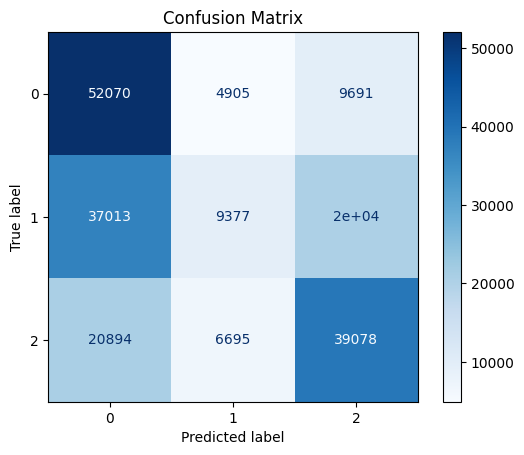

In [32]:
# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [34]:
joblib.dump(random_search.best_estimator_, 'xgb_model.pkl')
print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl
